<a href="https://colab.research.google.com/github/a01137646/MNA_Public/blob/main/MNA_IAyAA_semana_8_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

* Gerardo Aaron Castañeda Jaramillo - A01137646
* Dalina Aidee Villa Ocelotl - A01793258
* Yocelin Juárez Arroyo - A00819828
* Victor Hugo Avila Felipe - A01794425


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [339]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.dummy import DummyClassifier

from sklearn import svm

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, StratifiedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, make_scorer

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn import metrics

In [78]:
mypath = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"

data = pd.read_csv(mypath, sep=" ", header=None)

data.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','class']

print(data.shape)
data.head()

(690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [37]:
Y = data[['class']]
X = data.drop(labels='class',axis=1)

#**Ejercicio-1.** 

Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y validación. Usa un random_state=0. 

In [79]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=0)  

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(586, 14) : dimensión de datos de entrada para entrenamiento y validación
(104, 14) : dimensión de datos de entrada para prueba
(586, 1) : dimensión de variable de salida para entrenamiento y validación
(104, 1) : dimensión de variable de salida para prueba


#**Ejercicio-2.**

Hacer una análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas. Utiliza un Pipeline para evitar el filtrado de información

Observando lo que nos dice la documentación:
* A1:	0,1    CATEGORICAL a,b
* A2:	continuous.
* A3:	continuous.
* A4:	1,2,3         CATEGORICAL p,g,gg
* A5:  1, 2,3,4,5, 6,7,8,9,10,11,12,13,14    CATEGORICAL ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x 
* A6:	 1, 2,3, 4,5,6,7,8,9    CATEGORICAL ff,dd,j,bb,v,n,o,h,z 
* A7:	continuous.
* A8:	1, 0       CATEGORICAL t, f.
* A9: 1, 0	    CATEGORICAL t, f.
* A10:	continuous.
* A11:  1, 0	    CATEGORICAL t, f.
* A12:    1, 2, 3    CATEGORICAL s, g, p 
* A13:	continuous.
* A14:	continuous.
* A15:   1,2 +,-         (class attribute)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  class   690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [23]:
data.isnull().values.any()

False

Definimos variables por sus tipos en base a la documentación:

In [80]:
#definimos variables numéricas
num_nom = ['A2','A3','A7','A10','A13','A14']
#definimos variables categóricas
cat_nom = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

Observamos la frecuencia de cada nivel de las variables categóricas:

In [81]:
for col in cat_nom:
  print(data[col].value_counts(),'\n')

1    468
0    222
Name: A1, dtype: int64 

2    525
1    163
3      2
Name: A4, dtype: int64 

8     146
11     78
9      64
3      59
6      54
1      53
4      51
13     41
14     38
7      38
2      30
10     25
5      10
12      3
Name: A5, dtype: int64 

4    408
8    138
5     59
1     57
3      8
9      8
2      6
7      6
Name: A6, dtype: int64 

1    361
0    329
Name: A8, dtype: int64 

0    395
1    295
Name: A9, dtype: int64 

0    374
1    316
Name: A11, dtype: int64 

2    625
1     57
3      8
Name: A12, dtype: int64 



Observamos que algunos efectivamente, tienen niveles muy bajos. Una regla empírica para esto es que sean al menos 5% de la información. Así que transformamos aquellos que no lo cumplen. 

Una función para remplazar valores menores a cierto porcentaje del total de información con otro valor, para así poder agrupar: 

In [82]:
def freq_group(df,n,tres):
  x = df.copy()
  for indx in x.value_counts().index.tolist():
    if (x.value_counts()[indx]/x.value_counts().sum()) < tres:
      x = x.replace(to_replace=indx,value=n)
  return x

Vemos específicamente cada caso, y hacemos sus sustituciones: 

In [53]:
#CASO 1

#Para A4, agrupamos el valor menor de la categoria mas baja junto con el de la segunda mas baja, que se encuentra arriba del 20%
for var in ['A4','A12']:
  data[var] = freq_group(data[var],0,0.25)
#Para A5, A6, y A12 agrupamos todos los menores a 5% en un solo grupo
for var in ['A5','A6']:
  data[var] = freq_group(data[var],0,0.05)

In [83]:
#CASO 2

#agrupamos todos los menores a 5% en un solo grupo
for var in ['A4','A5','A6','A12']:
  data[var] = freq_group(data[var],0,0.05)

Observamos la frecuencia de cada nivel de las variables categóricas:

In [84]:
for col in cat_nom:
  print(data[col].value_counts(),'\n')

1    468
0    222
Name: A1, dtype: int64 

2    525
1    163
0      2
Name: A4, dtype: int64 

8     146
11     78
0      68
9      64
3      59
6      54
1      53
4      51
13     41
14     38
7      38
Name: A5, dtype: int64 

4    408
8    138
5     59
1     57
0     28
Name: A6, dtype: int64 

1    361
0    329
Name: A8, dtype: int64 

0    395
1    295
Name: A9, dtype: int64 

0    374
1    316
Name: A11, dtype: int64 

2    625
1     57
0      8
Name: A12, dtype: int64 



Observamos las variables numéricas:

In [55]:
data[num_nom].describe()

,A2,A3,A7,A10,A13,A14
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.568203,4.758725,2.223406,2.40000,184.014493,1018.385507
std,11.853273,4.978163,3.346513,4.86294,172.159274,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,1.000000
50%,28.625000,2.750000,1.000000,0.00000,160.000000,6.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,396.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100001.000000


Graficamos los histogramas de la variables numéricas con sus posibles transformaciones:

In [74]:
def Sqrt_cx(x):
  c = x.max()
  tmp = np.power(c+1-x,1/2)
  return tmp

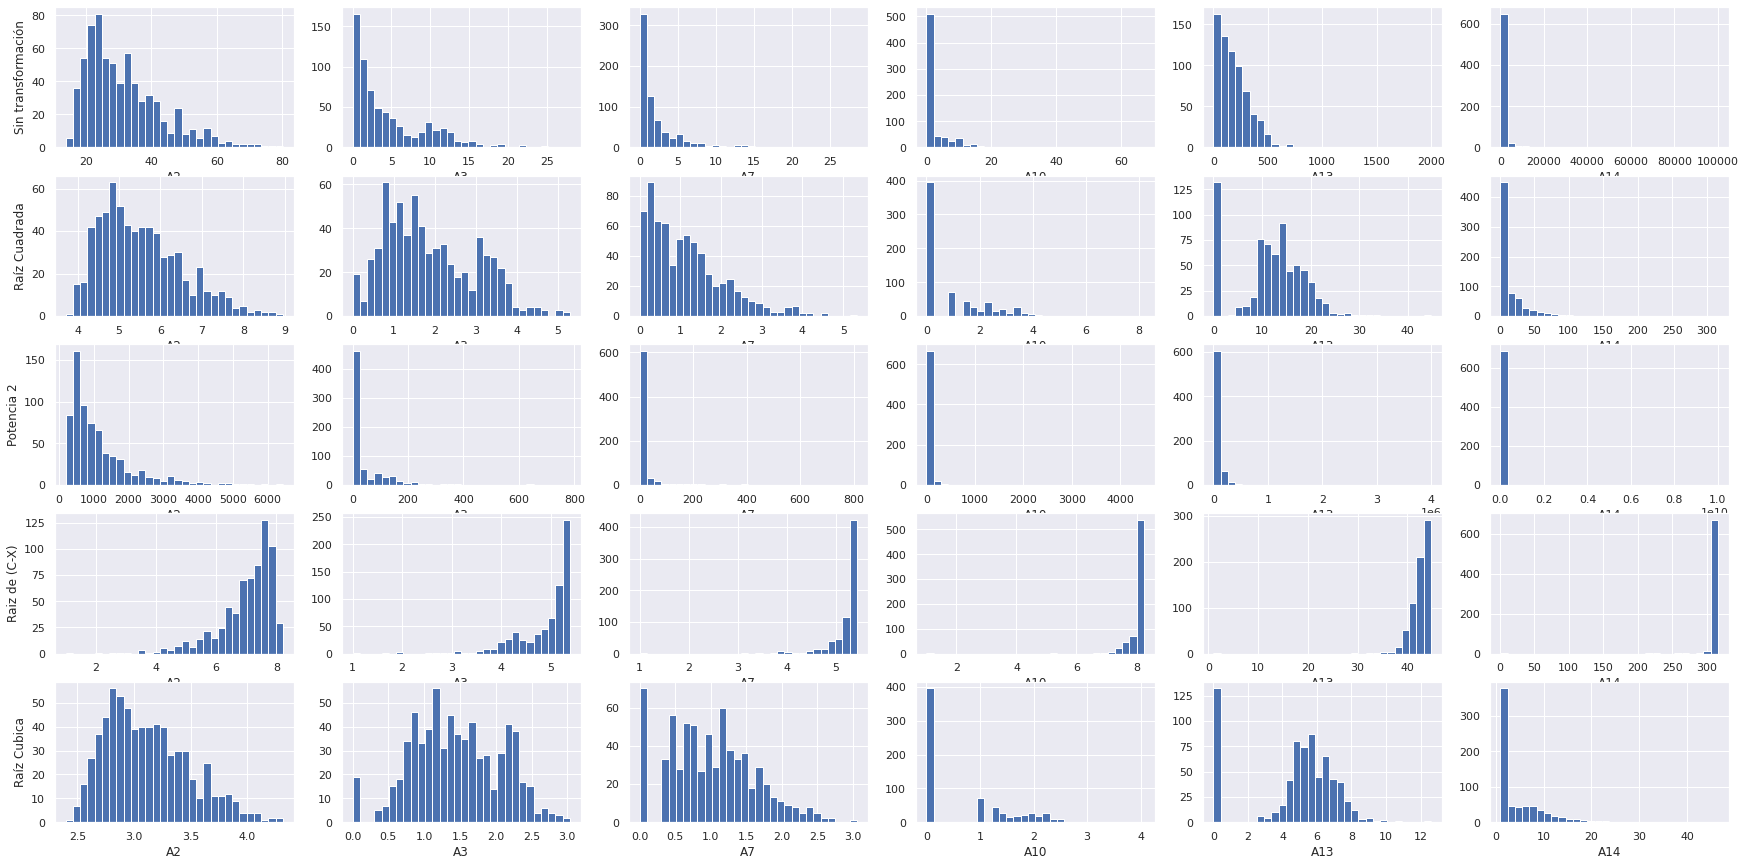

In [85]:
df_transform = data[num_nom]
nvar = len(data[num_nom].columns)
nplots = 5
sns.set(rc={'figure.figsize':(nvar*5,15)})
k=0
fig, axes = plt.subplots(nplots, nvar)   
for k in range(0,nvar):  
  plt.subplot(nplots, nvar,k+1) 

  Transf0 = df_transform.iloc[:,k].to_numpy().reshape(-1, 1) 
  plt.hist(Transf0, bins=30) 
  plt.xlabel(df_transform.columns[k])
  if k==0:
    plt.ylabel('Sin transformación')
  
  plt.subplot(nplots, nvar,k+1+nvar*1)    
  Transf1 = np.sqrt(Transf0)       
  plt.hist(Transf1, bins=30)                      
  plt.xlabel(df_transform.columns[k])
  if k==0:
    plt.ylabel('Raíz Cuadrada')

  plt.subplot(nplots, nvar,k+1+nvar*2)  
  Transf2 = np.power(Transf0,2)     
  plt.hist(Transf2, bins=30)                   
  plt.xlabel(df_transform.columns[k])
  if k==0:
    plt.ylabel('Potencia 2')

  plt.subplot(nplots, nvar,k+1+nvar*3)    
  Transf3 = Sqrt_cx(df_transform.iloc[:,k])        
  plt.hist(Transf3, bins=30)                   
  plt.xlabel(df_transform.columns[k])
  if k==0:
    plt.ylabel('Raiz de (C-X)')  

  plt.subplot(nplots, nvar,k+1+nvar*4)  
  Transf4 = np.power(Transf0,1/3)     
  plt.hist(Transf4, bins=30)                   
  plt.xlabel(df_transform.columns[k])
  if k==0:
    plt.ylabel('Raíz Cubica')

Donde observamos que, aunque existe para A10, A13 y A14 existe un gran numero de valores de valor 1, la transformación que mejor distribución nos da es la raíz cubica

Verificamos que no existan clases desbalanceadas en y:

In [86]:
data['class'].sum() / data['class'].shape[0]

0.4449275362318841

Finalmente, creamos nuestro pipeline con todas nuestras transformaciones y escalamiento:

In [138]:
def x_tran(X):
  X_ = X.copy() 
  X_ = np.power(X_,1/3)    
  return X_

In [139]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('CubicRoot', FunctionTransformer(x_tran)),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['A2','A3','A7','A10','A13','A14']

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
#catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder())])
catOHE_pipeline_nombres = [ 'A4','A5','A6','A12']


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

Dado que se hicieron cambios en el dataframe de ‘data’ para eliminar valores categóricos debajo del 5%, se vuelve a particionar el dataset

In [140]:
X = data.iloc[:,:-1]  
Y = data.iloc[:,-1]

In [143]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.15, random_state=0)  

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  
print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(586, 14) : dimensión de datos de entrada para entrenamiento y validación
(104, 14) : dimensión de datos de entrada para prueba
(586,) : dimensión de variable de salida para entrenamiento y validación
(104,) : dimensión de variable de salida para prueba


#**Ejercicio-3.**

Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto
que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las
siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar
la estrategia “stratified” en este caso? 


In [145]:
#creamos el modelo dummy
dummy_class = DummyClassifier(strategy='stratified')

#transformamos los datos en X
Xct = columnasTransformer.fit(Xtv)
Xtvt = Xct.transform(Xtv)
Xpt = Xct.transform(Xtest)

#entrenamos el modelo
dummy_class.fit(Xtvt, np.ravel(ytv))

DummyClassifier(strategy='stratified')

Utilizamos ‘stratified’ porque indica al modelo que sus predicciones sean sobre la base de la distribución de clases del conjunto de datos de entrenamiento. En este caso, genera para nuestra clase ‘1’ una probabilidad cercana al 44% en base a lo visto previamente en nuestro set de entrenamiento. 

In [162]:
#realizamos las predicciones
yhat = dummy_class.predict(Xtvt)

print('Accuracy:', accuracy_score(ytv,yhat))
print('f1_score:', f1_score(ytv,yhat))
print('Precision:', precision_score(ytv,yhat))
print('Recall:', recall_score(ytv,yhat))

Accuracy: 0.46757679180887374
f1_score: 0.4113207547169811
Precision: 0.4052044609665427
Recall: 0.41762452107279696


Lo cual se reafirma con las métricas de score al tener todas valores cercanos a esa probabilidad. 

#**Ejercicio-4.**

Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio anterior

In [270]:
#desactivamos warnings porque metrica precision levanta warning en gridsearch
import warnings
warnings.filterwarnings('ignore')

In [271]:
#obtenemos el modelo y los parámetros
modeloSVM_iter = svm.SVC()
cvSVM = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

dicc_grid = [{'C':[0.01, 0.1, 1, 10, 100, 1000], 
              'gamma':[1, 0.1, 0.01, 0.001, 0.0001,'scale','auto'],
              'kernel':['linear','poly','rbf','sigmoid']
              }]

scoring = ['accuracy','f1','precision','recall']   #zero_division = 0 para evitar warnings

grid = GridSearchCV(estimator=modeloSVM_iter, 
                    param_grid=dicc_grid, 
                    cv=cvSVM, 
                    scoring=scoring,
                    refit='accuracy',
                    error_score='raise')

In [272]:
#X y Y ya se transformaron previamente
grid.fit(Xtvt, np.ravel(ytv))

print('Mejor valor de Accuracy obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)
print('Mejor Index:',grid.best_index_)

Mejor valor de Accuracy obtenido con la mejor combinación: 0.8578202713795934
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}
Métrica utilizada: ['accuracy', 'f1', 'precision', 'recall']


In [273]:
#reactivamos warnings
warnings.filterwarnings('always')

In [314]:
print('Mejor valor de Accuracy obtenido con la mejor combinación:', grid.cv_results_['mean_test_accuracy'][grid.best_index_])
print('Mejor valor de f1_score obtenido con la mejor combinación:', grid.cv_results_['mean_test_f1'][grid.best_index_])
print('Mejor valor de precision obtenido con la mejor combinación:', grid.cv_results_['mean_test_precision'][grid.best_index_])
print('Mejor valor de recall obtenido con la mejor combinación:', grid.cv_results_['mean_test_recall'][grid.best_index_])

Mejor valor de Accuracy obtenido con la mejor combinación: 0.8578202713795934
Mejor valor de f1_score obtenido con la mejor combinación: 0.8401362280150738
Mejor valor de precision obtenido con la mejor combinación: 0.8410450649898584
Mejor valor de recall obtenido con la mejor combinación: 0.8416787614900823


In [326]:
#entrenamos modelo con hiperparametros y calculamos errores
modelo_SVM = svm.SVC(C=0.01,
                      gamma=1,
                      kernel='linear')  

modelo_SVM.fit(Xtvt, np.ravel(ytv))

SVC(C=0.01, gamma=1, kernel='linear')

In [327]:
#realizamos las predicciones
yhat = modelo_SVM.predict(Xtvt)

print('Accuracy:', accuracy_score(ytv,yhat))
print('f1_score:', f1_score(ytv,yhat))
print('Precision:', precision_score(ytv,yhat))
print('Recall:', recall_score(ytv,yhat))

Accuracy: 0.863481228668942
f1_score: 0.855072463768116
Precision: 0.8109965635738832
Recall: 0.9042145593869731


#**Ejercicio-5.**

Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas. Incluye tus conclusiones. 

In [315]:
#obtenemos listas de de cada split para cada metrica para poder graficarlas en diagrama de bigote
nom_resultados = list()
index = grid.best_index_
resultados = list()
scores = ['accuracy','f1','precision','recall']
for score in scores:
  resultados = list()
  for i in range(15):
    resultados.append(grid.cv_results_['split' + str(i) + '_test_' + score][index])
  nom_resultados.append(resultados)

In [320]:
#confirmamos que estemos calculando correctamente
i = 0
for i in range(len(scores)):
  print(scores[i] + ':', np.mean(nom_resultados[i]))
  i = i + 1

accuracy: 0.8578202713795934
f1: 0.8401362280150738
precision: 0.8410450649898584
recall: 0.8416787614900823


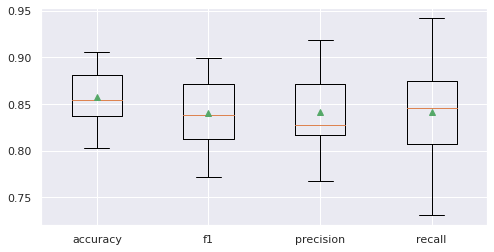

In [321]:
sns.set(rc={'figure.figsize':(8,4)})

plt.boxplot(nom_resultados, labels=scores, showmeans=True)

plt.show()

**PENDIENTE CONCLUSIONES**

#**Ejercicio-6.**

Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento, la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno de estos problemas. 


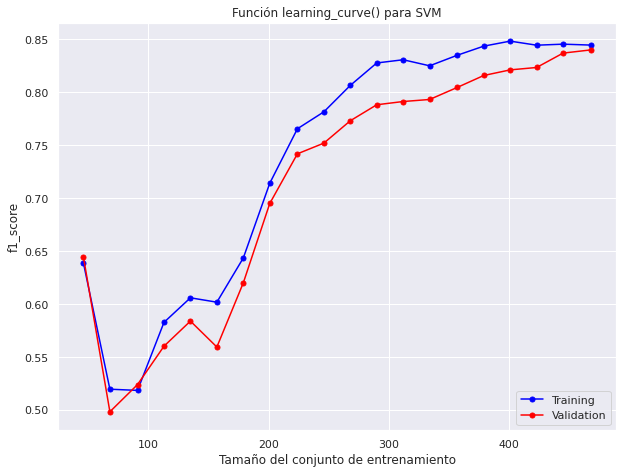

In [331]:
#obtenemos el modelo y los parametros de cross validation
modeloLC = modelo_SVM
cvLC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
#definimos los al menos 20 puntos de particion
delta_train_sz = np.linspace(0.1, 1.0, 20)

#obtenemos los datos de X transformados
Xx = Xtvt

#obtenemos la learning curve
train_sizes, train_scores, valid_scores = learning_curve(estimator=modeloLC, 
                                                        X=Xx, 
                                                        y=np.ravel(ytv),
                                                        cv=cvLC, 
                                                        train_sizes=delta_train_sz,
                                                        scoring='f1')

# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

sns.set(rc={'figure.figsize':(10,7.5)})

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve() para ' + 'SVM')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('f1_score')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

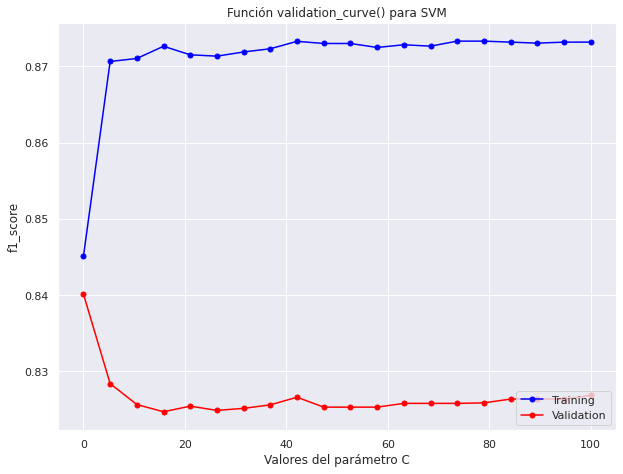

In [338]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = modelo_SVM
cvVC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

delta_C = np.linspace(0.01, 100, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xx, 
                                              np.ravel(ytv), 
                                              param_name="C", 
                                              param_range=delta_C,
                                              cv=cvVC,
                                              scoring='f1')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_C, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_C, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para ' + 'SVM')
plt.xlabel('Valores del parámetro C')
plt.ylabel('f1_score')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

#**Ejercicio-7.**

Con los mejores hiperparámetros entontrados encontrar la gráfica de la curva ROC y su área bajo la curva. 

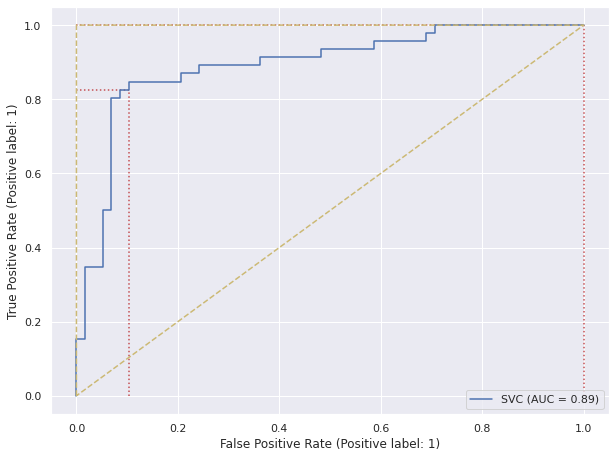

In [344]:
# Obtenemos las predicciones del modelo:
yhat = modelo_SVM.predict(Xpt)

# Obtenemos la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr):
fpr, tpr, _ = metrics.roc_curve(ytest, yhat)

metrics.RocCurveDisplay.from_estimator(modelo_SVM, Xpt, ytest)

plt.plot([0,0,1,0],[0,1,1,0], 'y--')

plt.hlines(tpr, 0, fpr, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(fpr, 0, tpr, colors='r', linestyles='dotted')  # como valor predeteminado
plt.show() 

Donde observamos una área bajo la curva de 0.89

#**Ejercicio-8.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica f1-score. 


In [ ]:
None

#**Ejercicio-9.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica gmean. 

In [ ]:
None

#**Ejercicio-10.**

Incluye tus conclusiones finales de la actividad.

In [ ]:
None

###**Fin de la Actividad de la semana 8.**